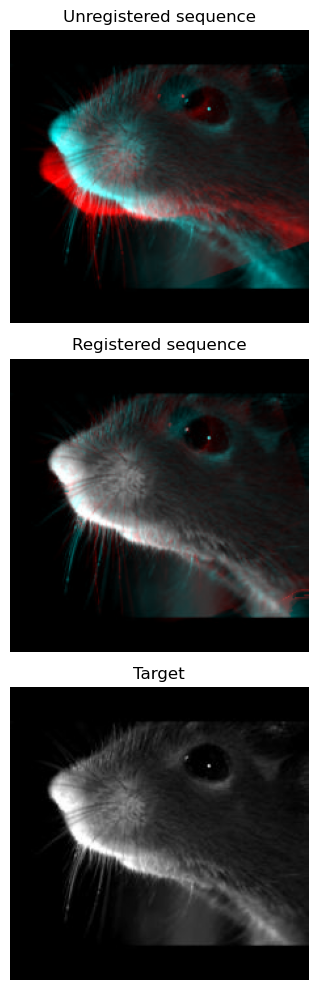

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage import io, color


### Code for registration of single test image onto single target image


# --- Load the sequence
image1 = io.imread('Test_img9160_rotate_rescale_augmented.jpg')
image0 = io.imread('Target_img9160_pad_rescale_augmented.jpg')

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

Do this with the newly modified images

Adjust so target image is 224x224

In [4]:
import numpy as np
from skimage import io
from skimage.transform import resize

# Load the image
image_path = 'Target_img9160_pad_rescale_augmented.jpg'  # Replace with your image path
image = io.imread(image_path)

# Resize the image to 224x224 pixels
resized_image = resize(image, (224, 224), anti_aliasing=True)

# Save the resized image
io.imsave('Target_img9160_resized_image_224x224.jpg', (resized_image * 255).astype(np.uint8)) 

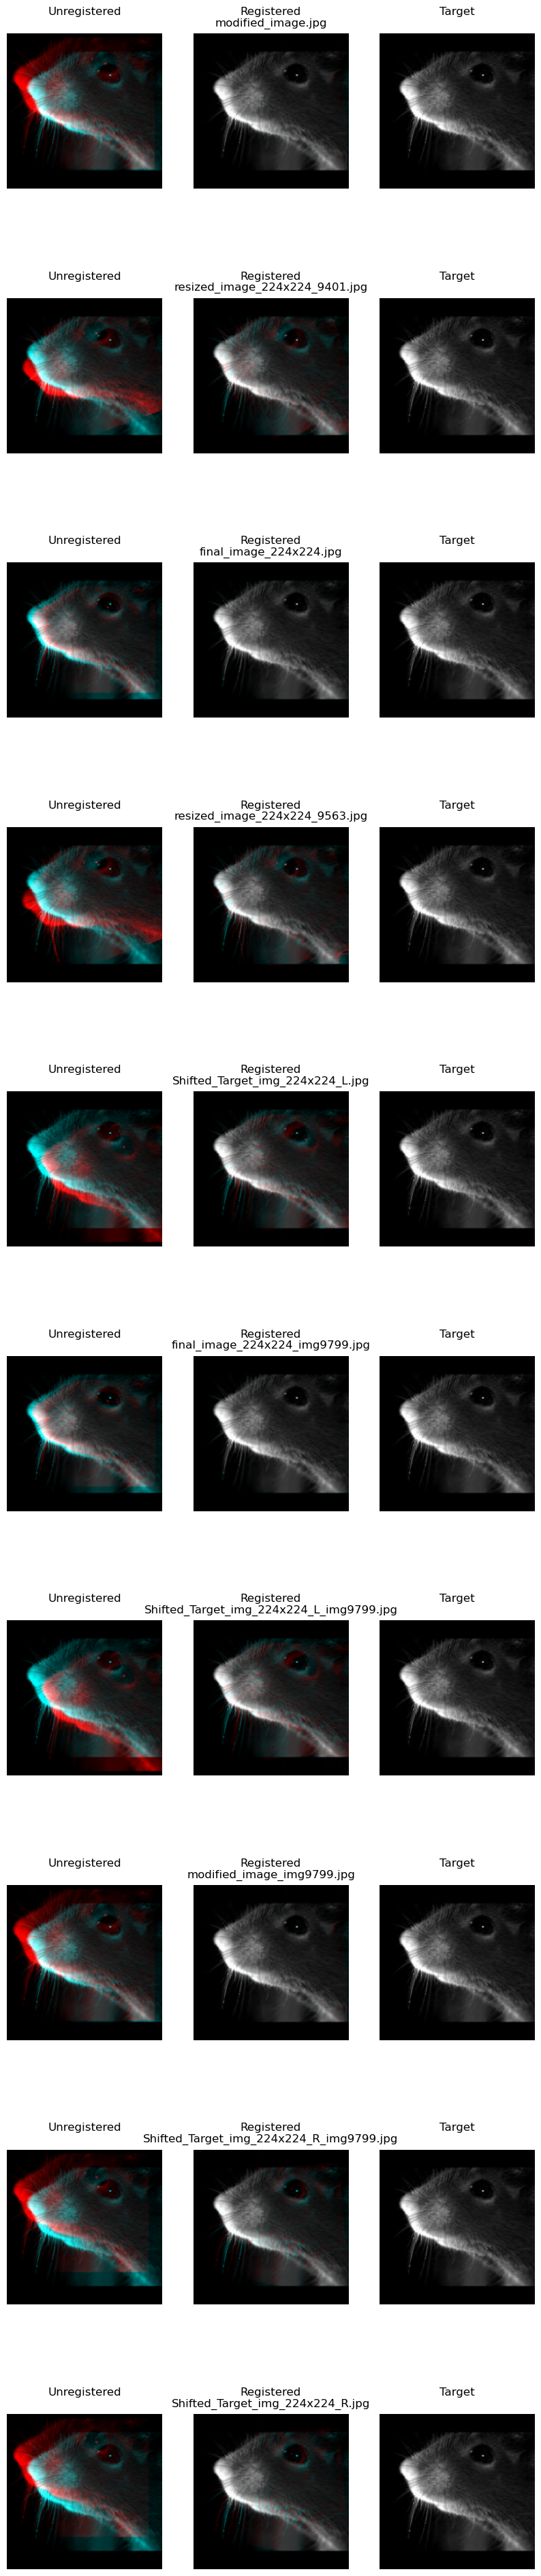

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1
from skimage import io
import os

# Load the target image
image0 = io.imread('Target_img9160_resized_image_224x224.jpg')
image0 = rgb2gray(image0)

# Path to the folder containing images
folder_path = 'Modified_images'
images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg')) and not img.startswith('.')]

# Adjust figsize and hspace to optimize space and image size
fig, axs = plt.subplots(len(images), 3, figsize=(10, 5 * len(images)))  # Enlarged each image

for i, img_name in enumerate(images):
    image_path = os.path.join(folder_path, img_name)
    image1 = io.imread(image_path)
    image1 = rgb2gray(image1)

    # Compute the optical flow
    v, u = optical_flow_tvl1(image0, image1)

    # Use the estimated optical flow for registration
    nr, nc = image0.shape
    row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
    image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

    # Build an RGB image with the unregistered sequence
    seq_im = np.zeros((nr, nc, 3))
    seq_im[..., 0] = image1
    seq_im[..., 1] = image0
    seq_im[..., 2] = image0

    # Build an RGB image with the registered sequence
    reg_im = np.zeros((nr, nc, 3))
    reg_im[..., 0] = image1_warp
    reg_im[..., 1] = image0
    reg_im[..., 2] = image0

    # Display the images
    axs[i, 0].imshow(seq_im)
    axs[i, 0].set_title("Unregistered", pad=20)
    axs[i, 0].set_axis_off()

    axs[i, 1].imshow(reg_im)
    axs[i, 1].set_title("Registered", pad=20)
    axs[i, 1].set_axis_off()

    axs[i, 2].imshow(image0, cmap='gray')
    axs[i, 2].set_title("Target", pad=20)
    axs[i, 2].set_axis_off()

    # Place image name above the plots
    axs[i, 1].annotate(img_name, (0.5, 1), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, xytext=(0, 5), textcoords='offset points')

# Adjust the space between rows of images
plt.subplots_adjust(hspace=0.1)  # Reduced space between rows

plt.show()


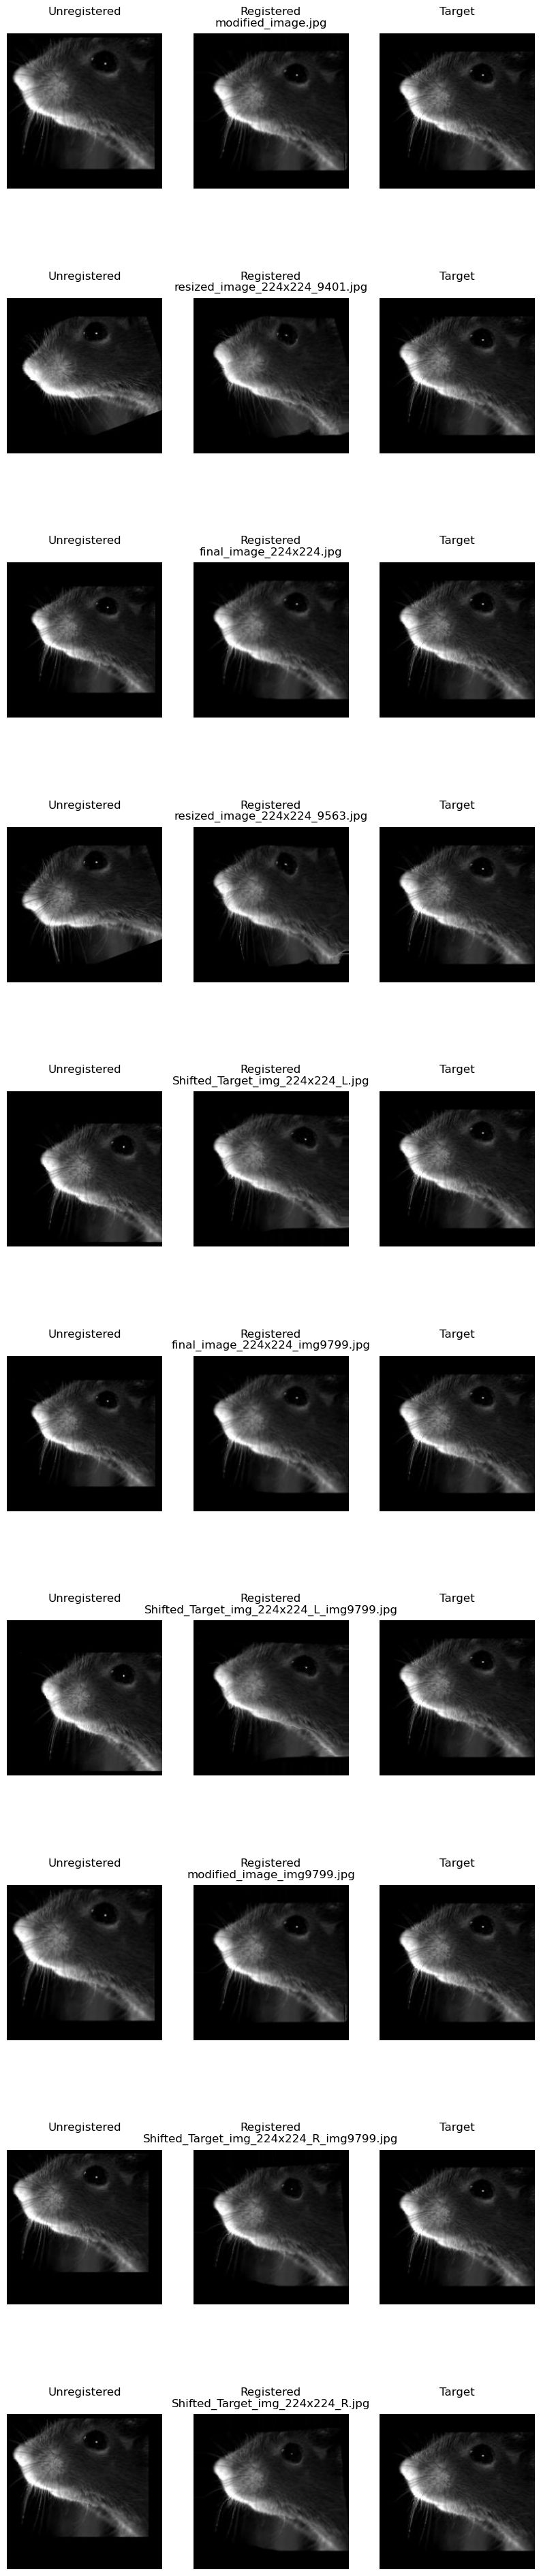

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1
from skimage import io
import os

# Load the target image
image0 = io.imread('Target_img9160_resized_image_224x224.jpg')
image0 = rgb2gray(image0)

# Paths to the folders containing images
folder_path = 'Modified_images'
registered_folder_path = 'Registered_Images'
images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg')) and not img.startswith('.')]

# Prepare the figure for plotting
fig, axs = plt.subplots(len(images), 3, figsize=(10, 5 * len(images)))

for i, img_name in enumerate(images):
    image_path = os.path.join(folder_path, img_name)
    image1 = io.imread(image_path)
    image1 = rgb2gray(image1)

    # Compute the optical flow
    v, u = optical_flow_tvl1(image0, image1)

    # Use the estimated optical flow for registration
    nr, nc = image0.shape
    row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
    image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

    # Save the registered image
    save_path = os.path.join(registered_folder_path, f"registered_{img_name}")
    plt.imsave(save_path, image1_warp, cmap='gray')

    # Display the images
    axs[i, 0].imshow(image1, cmap='gray')
    axs[i, 0].set_title("Unregistered", pad=20)
    axs[i, 0].set_axis_off()

    axs[i, 1].imshow(image1_warp, cmap='gray')
    axs[i, 1].set_title("Registered", pad=20)
    axs[i, 1].set_axis_off()

    axs[i, 2].imshow(image0, cmap='gray')
    axs[i, 2].set_title("Target", pad=20)
    axs[i, 2].set_axis_off()

    # Place image name above the plots
    axs[i, 1].annotate(img_name, (0.5, 1), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, xytext=(0, 5), textcoords='offset points')

# Adjust the space between rows of images
plt.subplots_adjust(hspace=0.1)
plt.show()
